# Assignment 1

In [76]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [77]:
md = {} 
def plotdist(dist, figtext):
    #Create dictionary of arrays using selected distribution
    mysize = (2000 / (np.array(range(1, 100)))).astype(int)
    md[dist] = {}
    if dist == 'Chi Squared': 
        for n in mysize:
            md[dist][n] = np.random.chisquare(100, size = n)
    if dist == 'Gaussian':
        for n in mysize:
            md[dist][n] = np.random.normal(100, size = n)
    if dist == 'Poisson':
        for n in mysize:
            md[dist][n] = np.random.poisson(100, size = n)
    if dist == 'Binomial':
        for n in mysize:
            md[dist][n] = np.random.binomial(200,0.5, size = n)
    if dist == 'Log Normal':
        for n in mysize:
            md['Log Normal'][n] = np.random.lognormal(np.log(60), size=n)
    
    #Create figure object
    fig, (ax_1, ax_2, ax_3) = pl.subplots(nrows=1, ncols=3, figsize=(18,6))
    pl.tight_layout(pad=5)
    
    #Plot histogram where N = 100 
    ax_1.hist(md[dist][100], bins = 30)
    ax_1.set_xlabel('Random Number (mean = 100)')
    ax_1.set_ylabel('Count')
    ax_1.set_title('A. ' + dist + ' Distribution (N = 100 & Mean = 100)')
    
    #Plot scatterplot of mean for each array
    md[dist]['means'] = {}
    for nn in md[dist]:
        if not type(nn) == str:
            md[dist]['means'][nn] = md[dist][nn].mean()
            ax_2.plot(nn, md[dist]['means'][nn], 'o')
            ax_2.plot([min(mysize), max(mysize)], [100, 100], 'k')
    ax_2.set_xlabel('Sample Size')
    ax_2.set_ylabel('Mean Value of Sample')
    ax_2.set_title('B. Mean Value of ' + dist + ' Distribution by Sample Size')
    
    #Plot histogram of each arrays mean
    allmeans = list(md[dist]['means'].values())
    ax_3.hist(allmeans,bins=30)
    ax_3.set_xlabel('Sample Mean')
    ax_3.set_ylabel('Count')
    ax_3.set_title('C. ' +dist + " Samples' Mean")
    
    fig.text(0.06,0, figtext)
    
    print (dist +" Distribution (where N = 100): Mean (%.2f) Standard Deviation (%.2f)\n"%(md[dist][100].mean(), md[dist][100].std()))

### Chi Squared Distribution

Chi Squared Distribution (where N = 100): Mean (101.91) Standard Deviation (12.55)



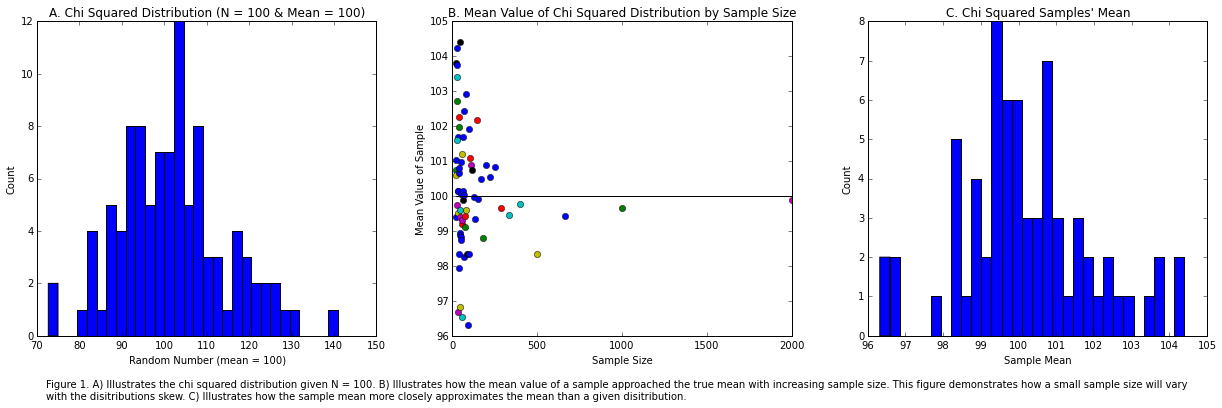

In [95]:
plotdist('Chi Squared', """Figure 1. A) Illustrates the chi squared distribution given N = 100. B) Illustrates how the mean value of a sample approached the true mean with increasing sample size. This figure demonstrates how a small sample size will vary\nwith the disitributions skew. C) Illustrates how the sample mean more closely approximates the mean than a given disitribution. """)

### Gaussian Distribution

Gaussian Distribution (where N = 100): Mean (99.91) Standard Deviation (0.89)



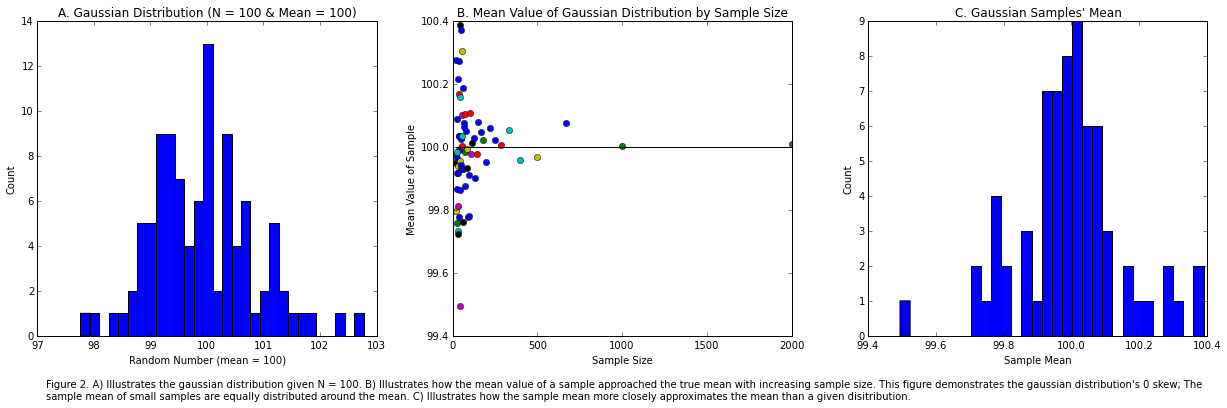

In [99]:
plotdist('Gaussian', """Figure 2. A) Illustrates the gaussian distribution given N = 100. B) Illustrates how the mean value of a sample approached the true mean with increasing sample size. This figure demonstrates the gaussian distribution's 0 skew; The \nsample mean of small samples are equally distributed around the mean. C) Illustrates how the sample mean more closely approximates the mean than a given disitribution. """)

### Poisson Distribution

Poisson Distribution (where N = 100): Mean (100.37) Standard Deviation (9.08)



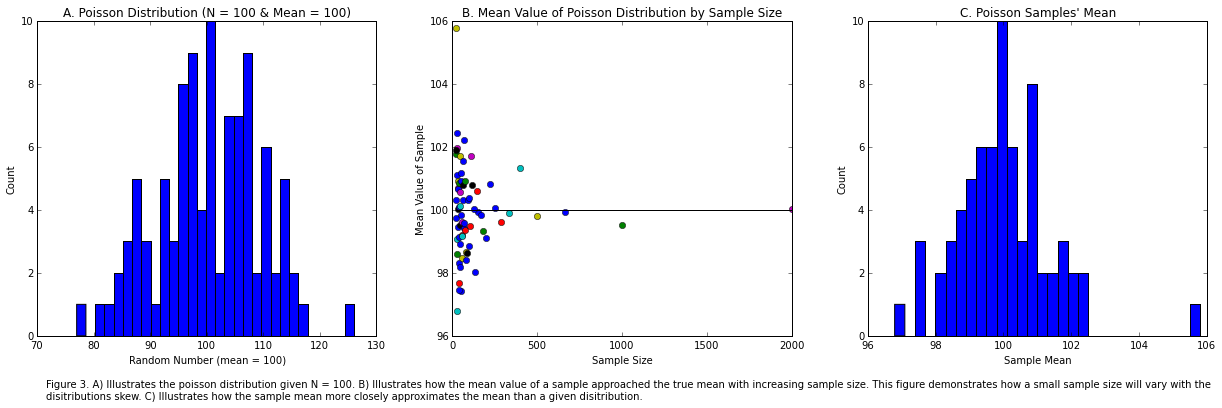

In [101]:
plotdist('Poisson', """Figure 3. A) Illustrates the poisson distribution given N = 100. B) Illustrates how the mean value of a sample approached the true mean with increasing sample size. This figure demonstrates how a small sample size will vary with the \ndisitributions skew. C) Illustrates how the sample mean more closely approximates the mean than a given disitribution. """)

### Binomial Distribution

Binomial Distribution (where N = 100): Mean (100.60) Standard Deviation (7.57)



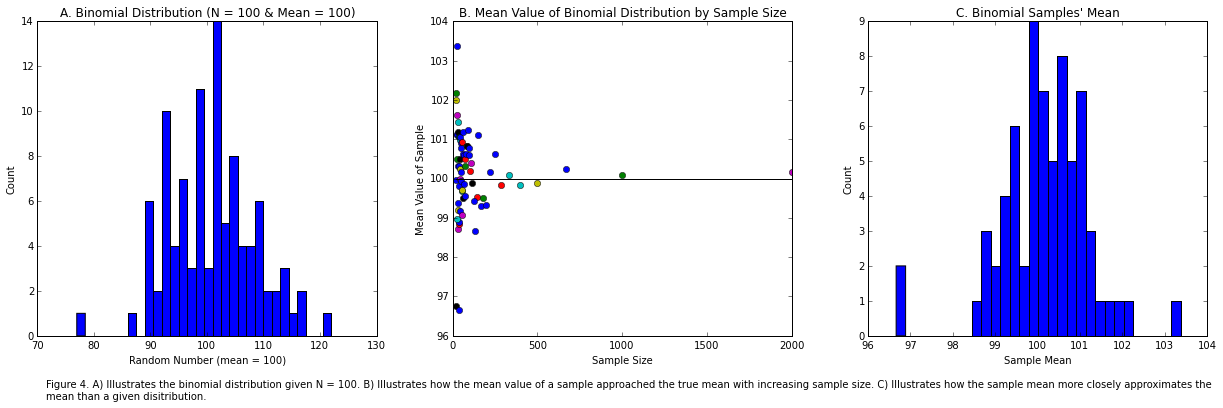

In [103]:
plotdist('Binomial', """Figure 4. A) Illustrates the binomial distribution given N = 100. B) Illustrates how the mean value of a sample approached the true mean with increasing sample size. C) Illustrates how the sample mean more closely approximates the \nmean than a given disitribution. """)

### Log Normal Distribution

Log Normal Distribution (where N = 100): Mean (102.20) Standard Deviation (104.77)



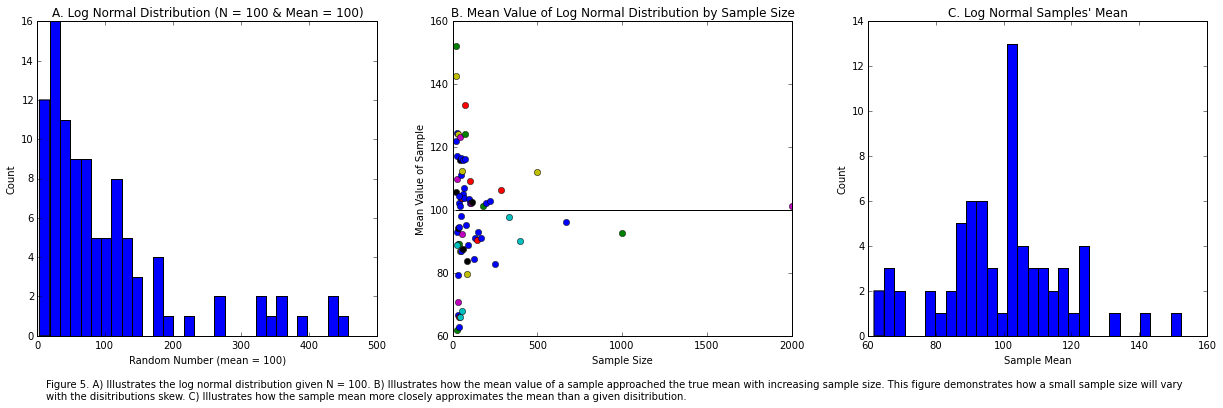

In [105]:
plotdist('Log Normal', """Figure 5. A) Illustrates the log normal distribution given N = 100. B) Illustrates how the mean value of a sample approached the true mean with increasing sample size. This figure demonstrates how a small sample size will vary\nwith the disitributions skew. C) Illustrates how the sample mean more closely approximates the mean than a given disitribution. """)

### Distribution of all Sample Means

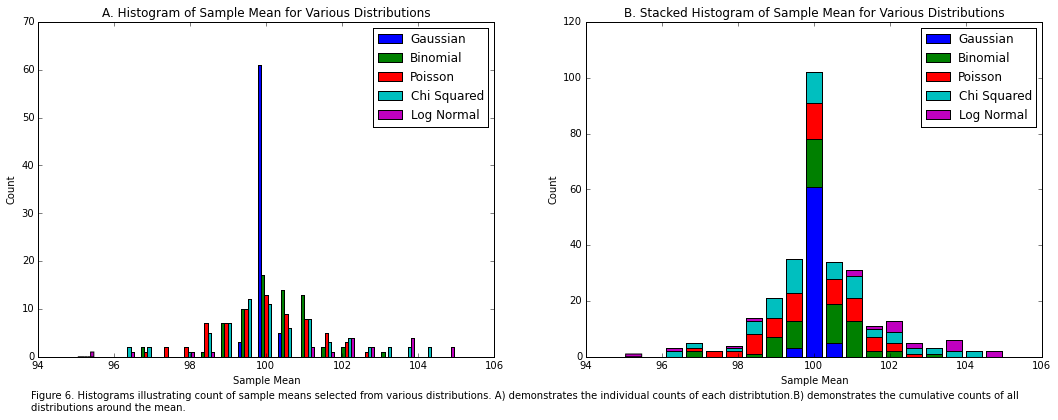

In [106]:
means = []
dists = ['Gaussian','Binomial','Poisson','Chi Squared','Log Normal']
for x in dists:
    means.append(list(md[x]['means'].values()))
    
fig, (hist_1, hist_2) = pl.subplots(nrows = 1, ncols = 2, figsize = (18,6))
hist_1.hist(means, bins = np.linspace(95,105,20), label = dists)
hist_1.legend()
hist_1.set_xlabel('Sample Mean')
hist_1.set_ylabel('Count')
hist_1.set_title('A. Histogram of Sample Mean for Various Distributions')

hist_2.hist(means, bins = np.linspace(95,105,20), label = dists, stacked = True)
hist_2.legend()
hist_2.set_xlabel('Sample Mean')
hist_2.set_ylabel('Count')
hist_2.set_title('B. Stacked Histogram of Sample Mean for Various Distributions')

fig.text(0.12,0,"""Figure 6. Histograms illustrating count of sample means selected \
from various distributions. A) demonstrates the individual counts of each distribtution.\
B) demonstrates the cumulative counts of all\ndistributions around the mean.""")

# Assignment 2

In [84]:
#Ho: 24 passes are purchased in equal or less amounts on weekends as on weekdays.
#Ha: More 24hr passes are purchased on weekends (Sat - Sun) than weekdays. 

In [107]:
df = pd.read_csv('Citibike.csv')
df.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Cumulative trips (since launch):,Miles traveled today (midnight to 11:59 pm),Miles traveled to date:,Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm),7-Day Passes Purchased (midnight to 11:59 pm)
0,4/1/2016,34448,26384204,67595,48286873,163963,1113,0,82
1,4/2/2016,21838,26406042,46206,48333079,164031,1193,0,63
2,4/3/2016,15321,26421363,28615,48361694,164102,448,0,31
3,4/4/2016,12302,26433665,20143,48381837,164167,49,0,19
4,4/5/2016,26236,26459901,43723,48425560,164237,341,0,56


In [108]:
df = df.drop(df.columns[[1,2,3,4,5,7,8]], axis=1)
df.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm)
0,4/1/2016,1113
1,4/2/2016,1193
2,4/3/2016,448
3,4/4/2016,49
4,4/5/2016,341


In [109]:
df['Date'] = pd.to_datetime(df['Date'])
df1 = df.copy()
df1['days'] = df[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)
df1.head()

,Date,24-Hour Passes Purchased (midnight to 11:59 pm),days
0,2016-04-01,1113,Friday
1,2016-04-02,1193,Saturday
2,2016-04-03,448,Sunday
3,2016-04-04,49,Monday
4,2016-04-05,341,Tuesday


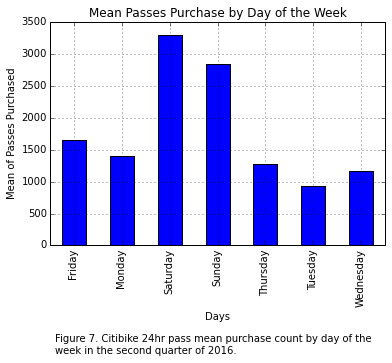

In [119]:
#df1.days.value_counts().plot(kind='bar')
df1.groupby(['days'])['24-Hour Passes Purchased (midnight to 11:59 pm)'].mean().plot(kind='bar')
pl.ylabel('Mean of Passes Purchased')
pl.xlabel('Days')
pl.title('Mean Passes Purchase by Day of the Week')
pl.text(-0.4,-1700,'Figure 7. Citibike 24hr pass mean purchase count by day of the \nweek in the second quarter of 2016.')

# Assignment 3